In [25]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
from statsmodels.tsa import seasonal, stattools

In [8]:
sns.set_style('darkgrid')

## Importing Data

In [4]:
train_data = pd.read_csv('./Datasets/train_data.csv', parse_dates=['application_date'], index_col='application_date')

In [5]:
train_data.head()

,segment,branch_id,state,zone,case_count
application_date,,,,,
2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


## Visualizing The Time Series

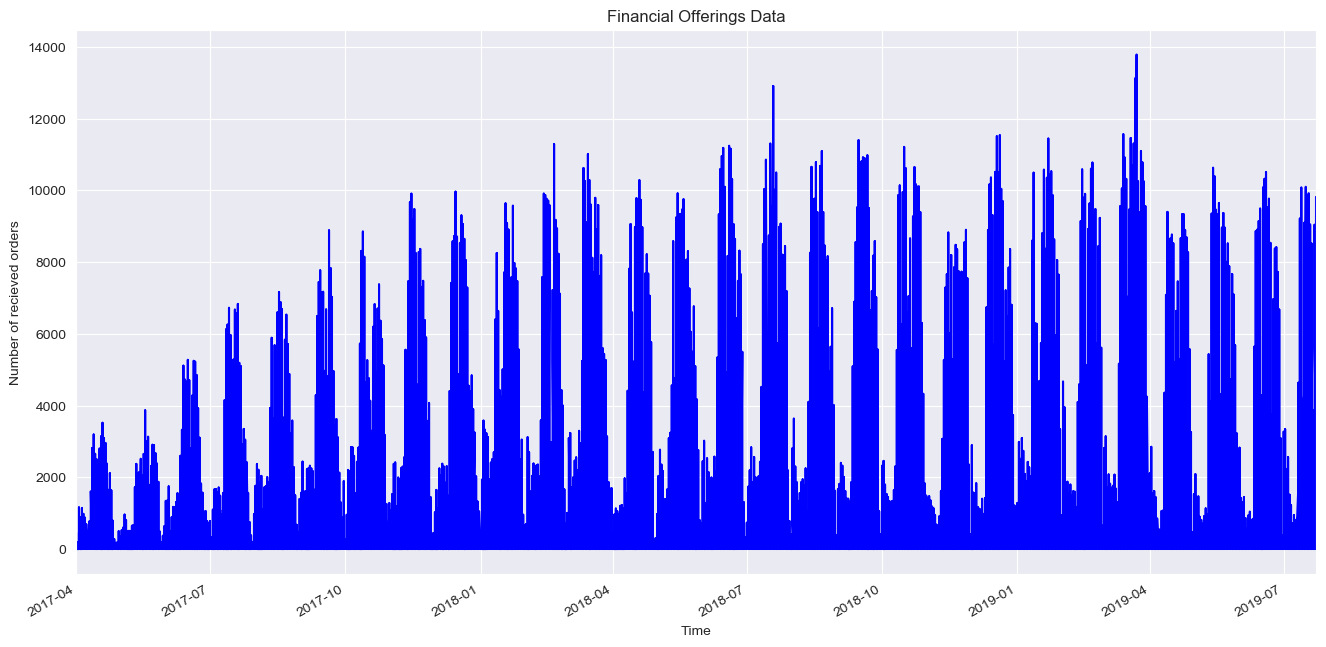

In [10]:
plt.figure(figsize=(16,8), dpi=100)
train_data['case_count'].plot(color='b')
plt.xlabel('Time')
plt.ylabel('Number of recieved orders')
plt.title('Financial Offerings Data')
plt.show()

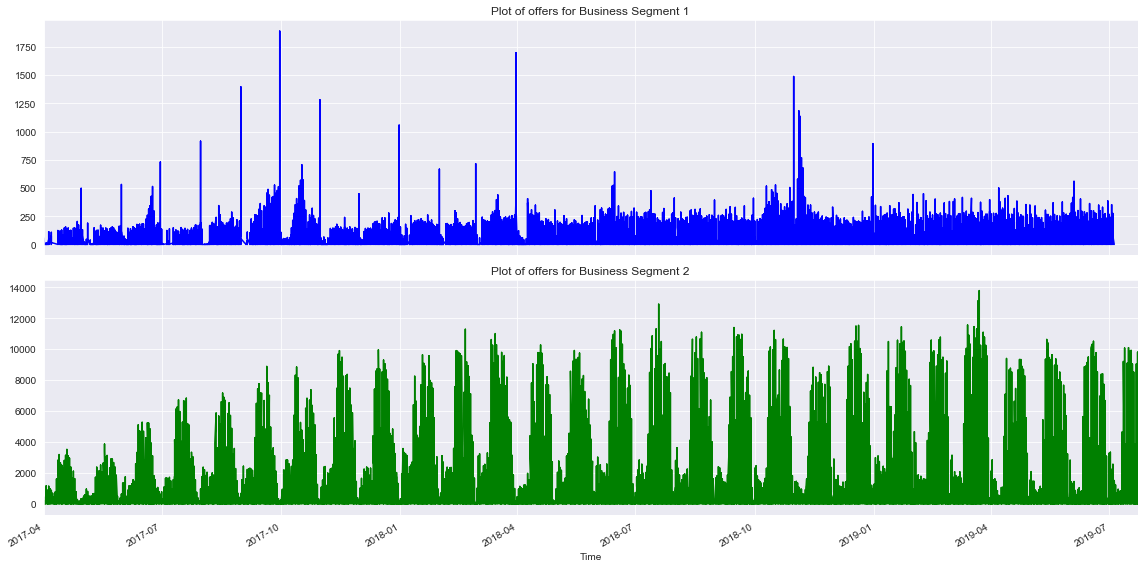

In [14]:
## Financial offering of two business segments
train_segment1 = train_data[train_data['segment'] == 1]
train_segment2 = train_data[train_data['segment'] == 2]
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(16, 8), sharex=True)
train_segment1['case_count'].plot(ax=axarr[0], color='b')
axarr[0].set_title('Plot of offers for Business Segment 1')
train_segment2['case_count'].plot(ax=axarr[1], color='g')
axarr[1].set_title('Plot of offers for Business Segment 2')
plt.xlabel('Time')
plt.tight_layout()
plt.show()

## Time Series Decomposition

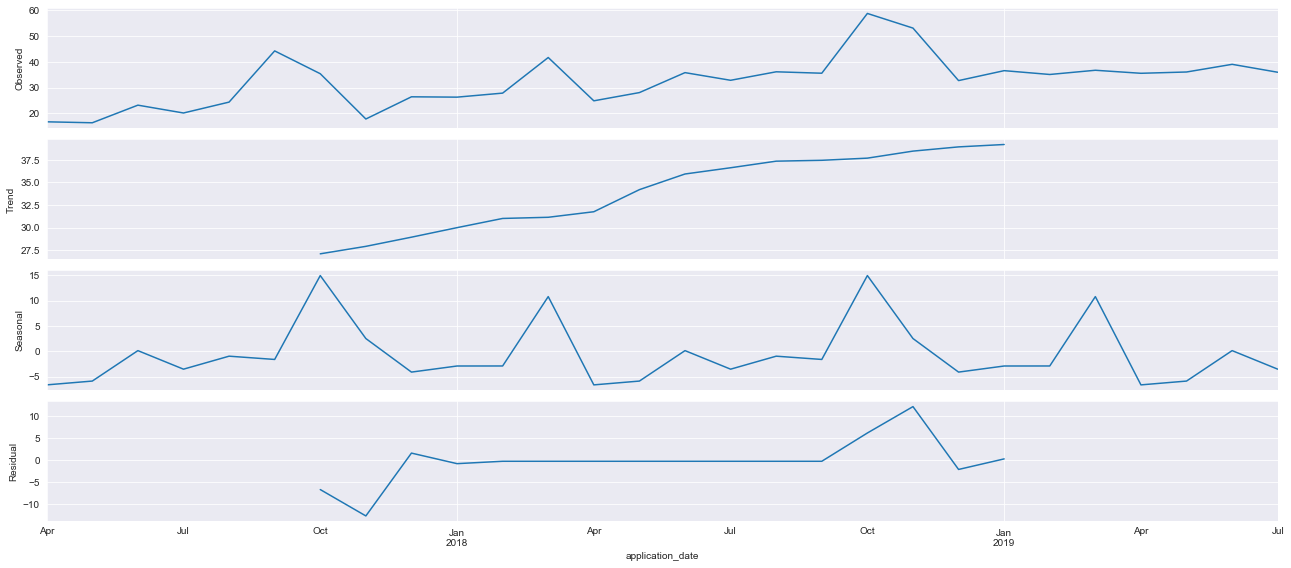

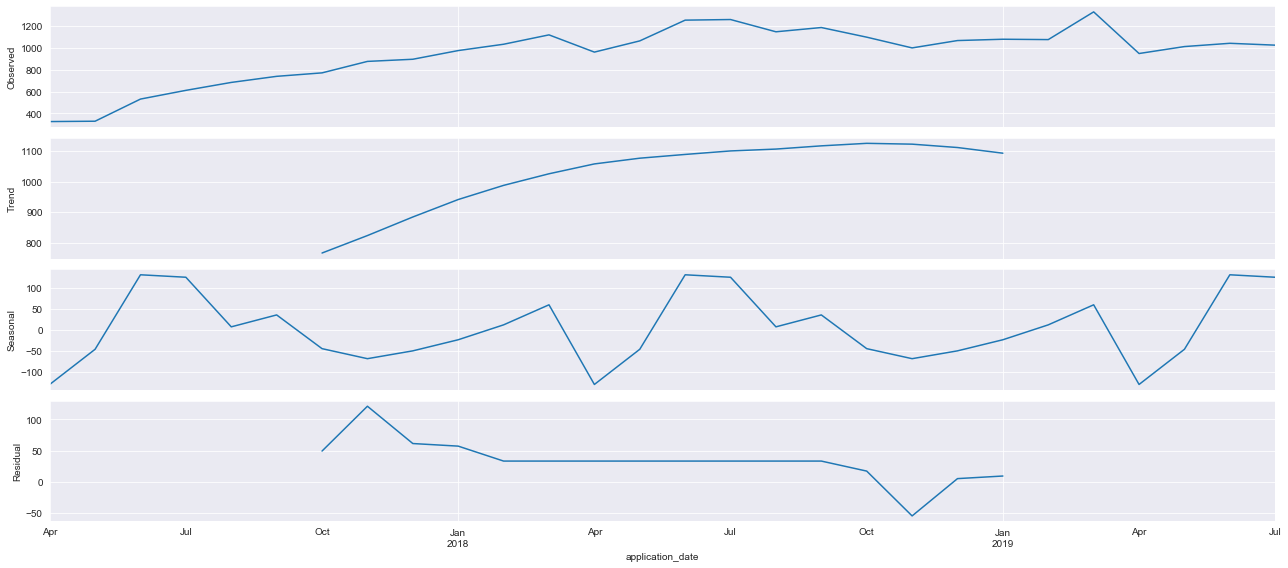

In [35]:
month_avg_train_segment1 = train_segment1['case_count'].resample('MS').mean()
month_avg_train_segment2 = train_segment2['case_count'].resample('MS').mean()

rcParams['figure.figsize'] = 18, 8
decompose_segment1 = seasonal.seasonal_decompose(month_avg_train_segment1, model='additive')
decompose_segment2 = seasonal.seasonal_decompose(month_avg_train_segment2, model='additive')
fig1 = decompose_segment1.plot()
fig2 = decompose_segment2.plot()
plt.show()